<a href="https://colab.research.google.com/github/eduardanevess/AppIntent/blob/main/EDUARDA_NEVES_DAMASCENO_SILVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

Primeiro passo é importar as bibliotecas que serão utilizadas para a análise.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Foi criada a váriavel 'df' para receber o dataset e através da biblioteca pandas foi usada a função read_csv pois o arquivo que contém os dados está no formato csv. Com este código o aquivo vai ser lido pelo pandas, será armazenado pla variável df e df.head trará as primeiras 5 linhas desse dataframe.

In [ ]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Essa função traz todos os nomes das colunas.

In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Dicionário que explica o que é cada coluna.

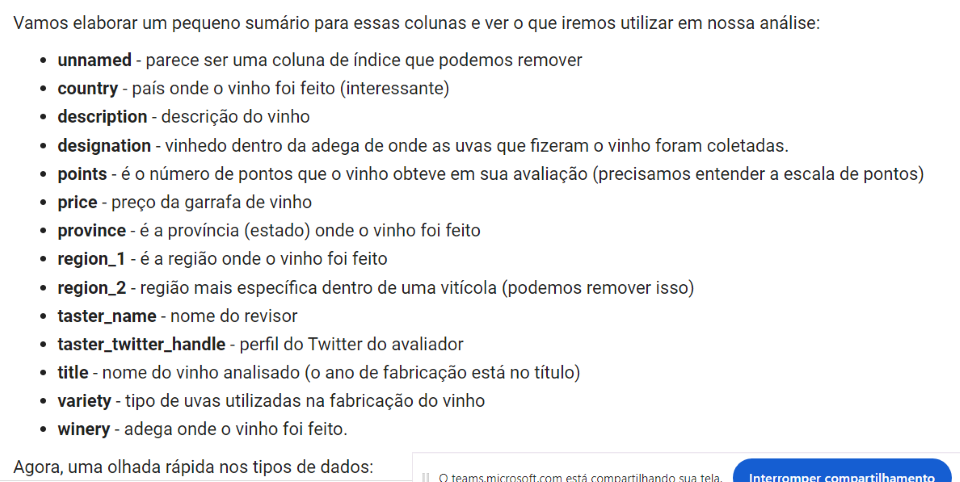

Este código traz informações sobre os tipos de dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Existem algumas colunas que podemos descartar , por exemplo: region_2, taster_name e taste_twitter_handle.

O comando describe avalia as colunas que possuem valores numéricos.

In [ ]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


O describe() nos apresenta uma distribuição de notas para vinhos, onde a pontuação mínima é 80 e a máxima é 100. Também podemos observar que a garrafa mais barata custa 4 dolares e a mais cara 3.300 dolares. De acordo com este site, a classificação das notas é a seguinte:

98-100 - Clássico 94-97 - Soberbo 90-93 - Excelente 87-89 - Muito bom 83-86 - Bom 80-82 - Aceitável"

Com a função value_counts() podemos agrupar para contar a quantidade de vinhos que foram avaliados por cada pais.

In [ ]:
df["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


A maioria dos vinhos avaliados são dos EUA, França, Itália, Espanha e Portugal.

A função value_conts também pode ser utilizada para verificar quais tipos de uva foram mais utilizadas na fabricação dos vinhos avaliados.

In [ ]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


A maioria dos tipos de uva que mais foram utilizados foram: : Pinot Noir,Chardonnay, Cabernet Sauvignon, Red Blend e Bordeaux-style Red Blend.

# Limpeza dos Dados

Primeiro passo para a limpeza de dados é fazer uma cópia do DataFrame e em seguida remover os dados que não vamos utilizar e tratar os problemas.


A função copy faz uma cópia do DataFrame.

In [ ]:
df1 = df.copy()

Com a cópia feita o próximo passo é remover as colunas que não vão ser utilizadas.*texto em itálico*

In [ ]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Próxima etapa é remover os dados ausentes, para isso foi feito uma contagem dos dados com a função info.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Alguns calculos de proporção na coluna preço (que é bastante importante para nossa análise).

In [ ]:
df1.shape

(129971, 8)

In [ ]:
print("{:.0%}".format(df1["price"].count()/df1.shape[0]))

93%


Nesta etapa foi retirado da coluna preço os valores nulos e filtrado também por país e uvas que também contém dados nulos.

In [ ]:
df1 = df1.dropna(subset=["price", "country", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


Agora o DataFrae está sem nulos e pronto ara a etapa de análise!

# Análise exploratória

Visualizar a distribuição de pontos dos dados durante a avaliação dos vinhos.

Text(0, 0.5, 'Frequência')

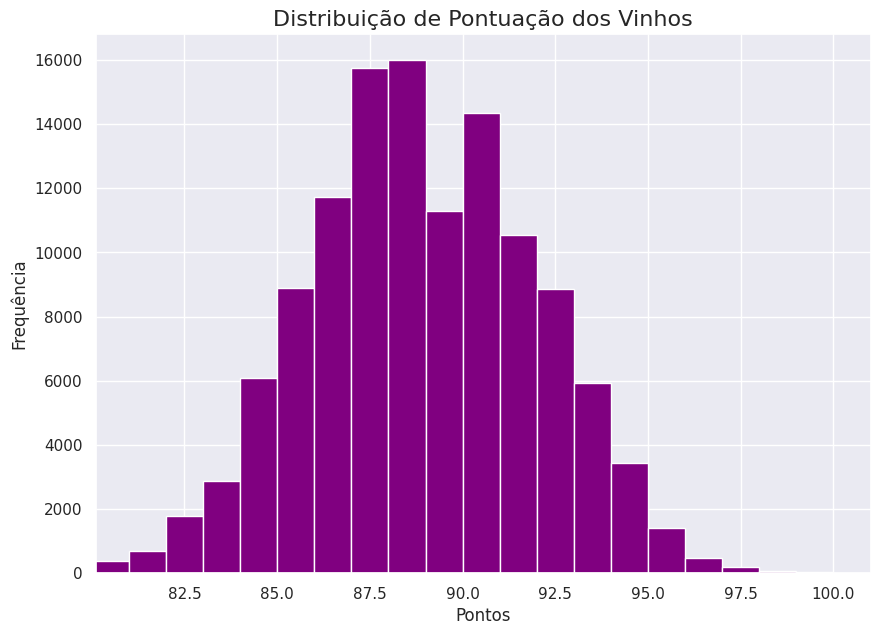

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(data=df1, x="points", bins=np.arange (80, df1['points'].max()+1, 1), color = 'purple')
plt.xlim(80.100)
plt.title("Distribuição de Pontuação dos Vinhos", fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("Frequência")

Visualizar quais os países estão no Top 10 que mais produzem vinhos.

In [ ]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


Com base nesse filtro foi gerado um gráfico para comparar os países qe mais tiveram vinhos avaliados:

Text(0, 0.5, 'Total de avaliações')

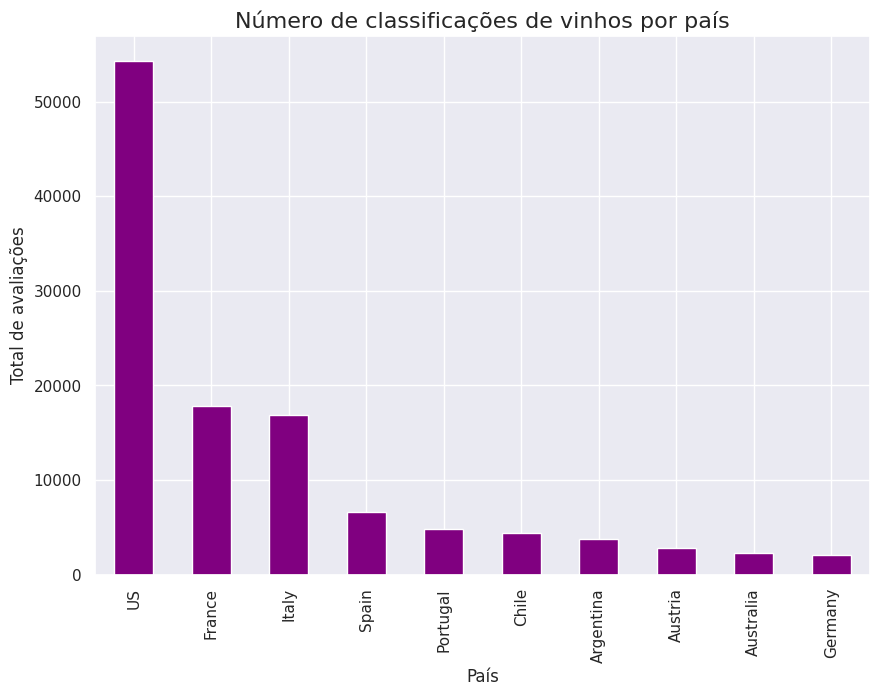

In [ ]:
plt.figure(figsize=(10,7))
country_top_10.plot(kind="bar", color="purple")
plt.title("Número de classificações de vinhos por país", fontsize=16)
plt.xlabel("País")
plt.ylabel("Total de avaliações")

Com base no gráfico acima o próximo passo é ver quantos países produzem vinho de melhor qualidade de acordo com as classificações.

In [ ]:
melhor_qualidade = df1.groupby("country") ["points"].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
#converter em uma série o DataFrame usando o método to_frame()
melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


Gerar um gráfico desse filtro

<ipython-input-52-fcc7e0ec9005>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

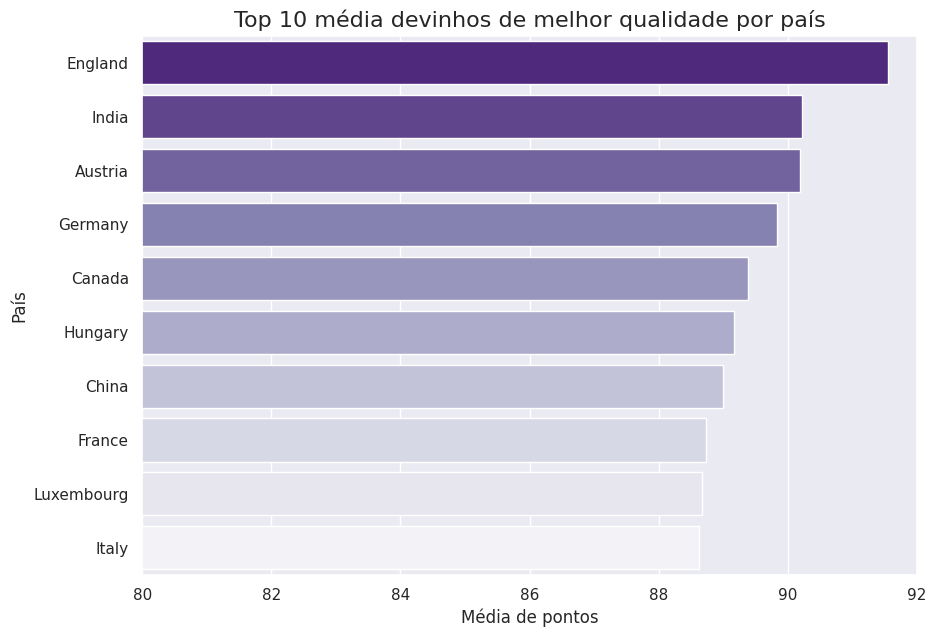

In [ ]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title("Top 10 média devinhos de melhor qualidade por país", fontsize=16)
plt.xlabel("Média de pontos")
plt.ylabel("País")

Podemos ver com a média de pontos que o país com melhor avaliação (que produziu o vinho de melhor qualidade) foi a inglaterra. Isso ocorre, porque talvex haja menos vinhos na inglaterra no DataFrame e eles tenham uma pontuação alta, representando um aumento na média. Vale a pena investigar isso mais a fundo olhando os paises com pontuiação máxima acima de 95(vinhos excelentes).

In [ ]:
#número de vinhos por pais com classificações mais altas 95-100
high_scores = df1[df1["points"] >= 95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


Os paises com classificação mais alta 95-100 pontos, dierem do nosso gráfico de pontuações mais altas com base nas médias. Podemos criar um gráfico do tipo bloxpot que nos prmitirá ver o máximo, o minimoi e a média das pontuações por cada país. Como essa base de dados tem mais vinhos avaliados dos EUA, é provável que haja uma grande variedade de vinhos do país, enquanto a Inglaterra, que obteve a melhor pontuação média, tem menos vinhos na base de dados, resultando em uma comparação desigual.

Text(0, 0.5, 'País')

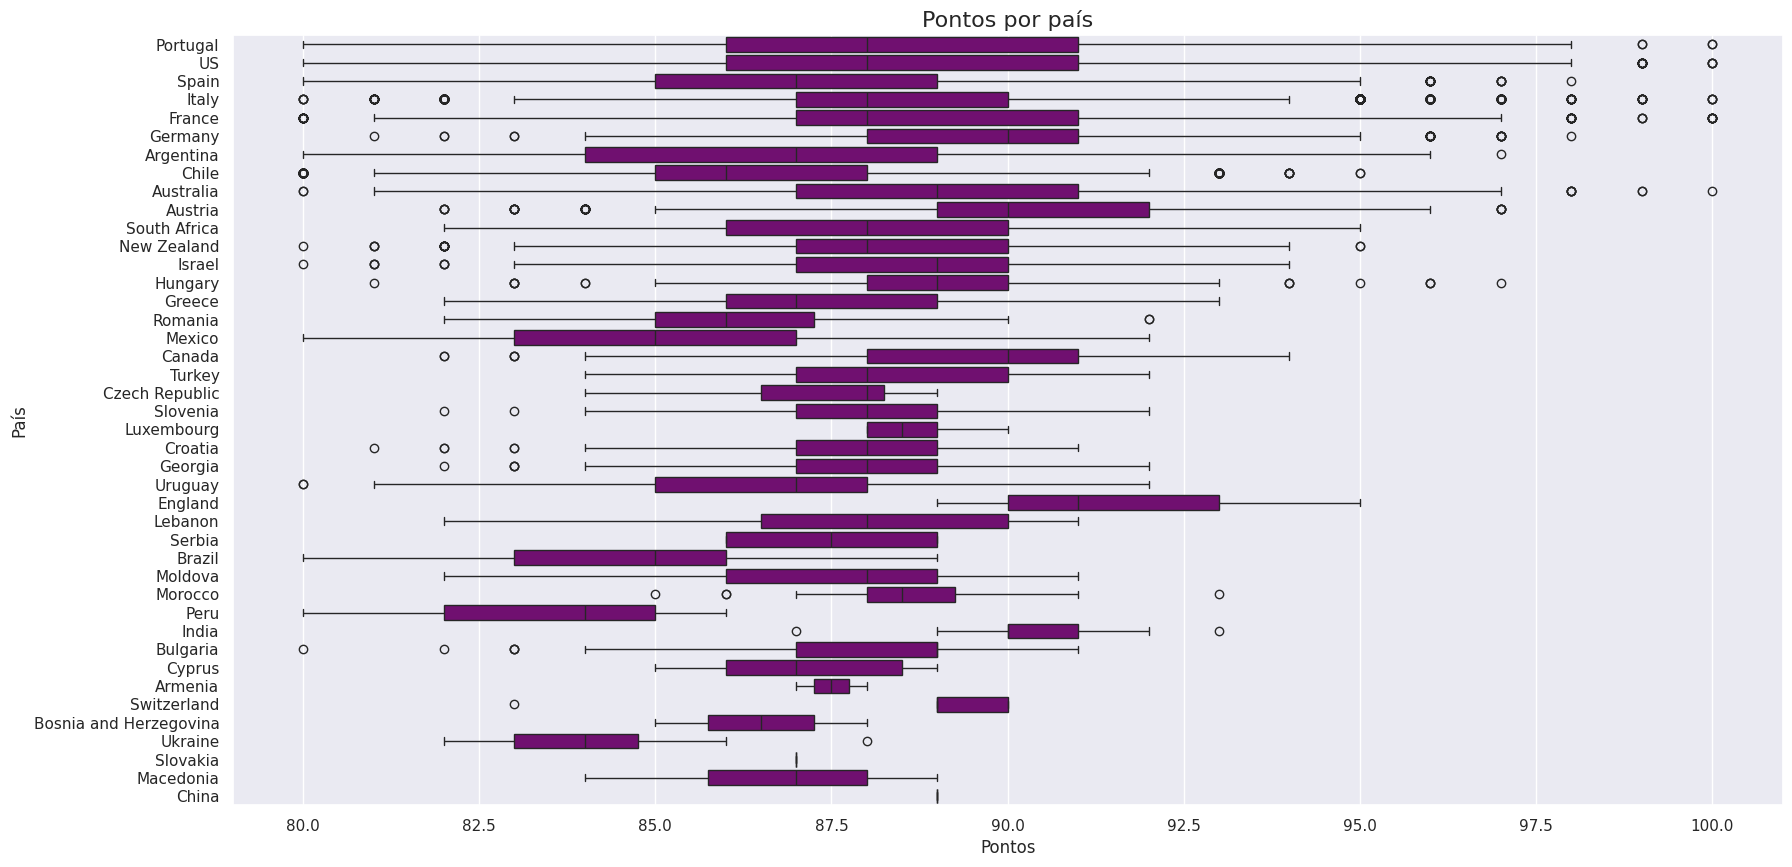

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color='Purple')
plt.title('Pontos por país', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País')


Embora os vinhos da Inglaterra tenham os pontos mais altos em média, os vinhos de Portugal, EUA, Itália, França e Austrália receberam uma pontuação perfeita de 100. Há mais vinhos desses países na base de dados, portanto, eles receberam uma gama maior de pontos.

Ok, agora que vimos as distribuições de pontos por cada país, vamos investigar o preço do vinho nos países:

<ipython-input-55-584bd954158d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

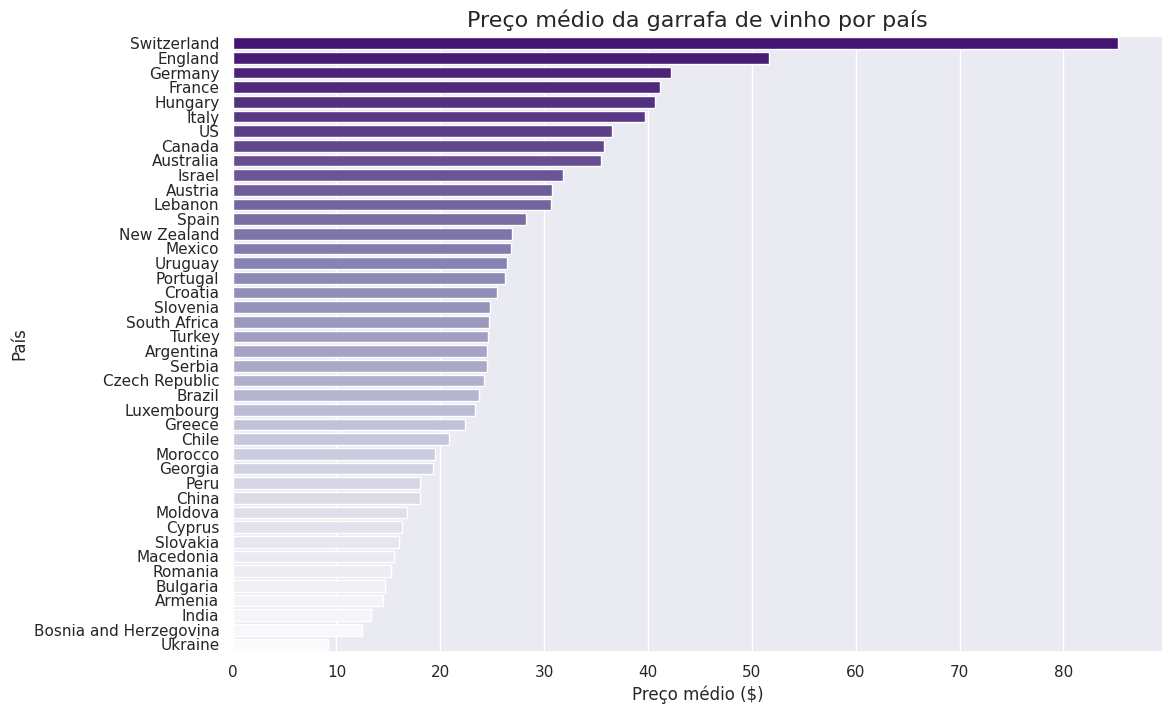

In [ ]:
average_price = df1.groupby("country")['price'].mean()  # Calcula a média da coluna 'price' por país
average_price = average_price.sort_values(ascending=False)  # Ordena os valores de forma decrescente
y = average_price.index.to_series()
x = average_price.values  # Usa os valores ao invés de acessar pela chave

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')


A Suíça produz o vinho mais caro, com o preço médio da garrafa de mais de 80 dolares. Já o vinho da Ucrânia está no outro extremo, com o preço médio mais baixo, 10 dolares a garrafa. Vamos investigar se o preço está relacionado à qualidade do vinho. A utilização de histogramas para essa tarefa parece um bom plano:

Text(0, 0.5, 'Frequência')

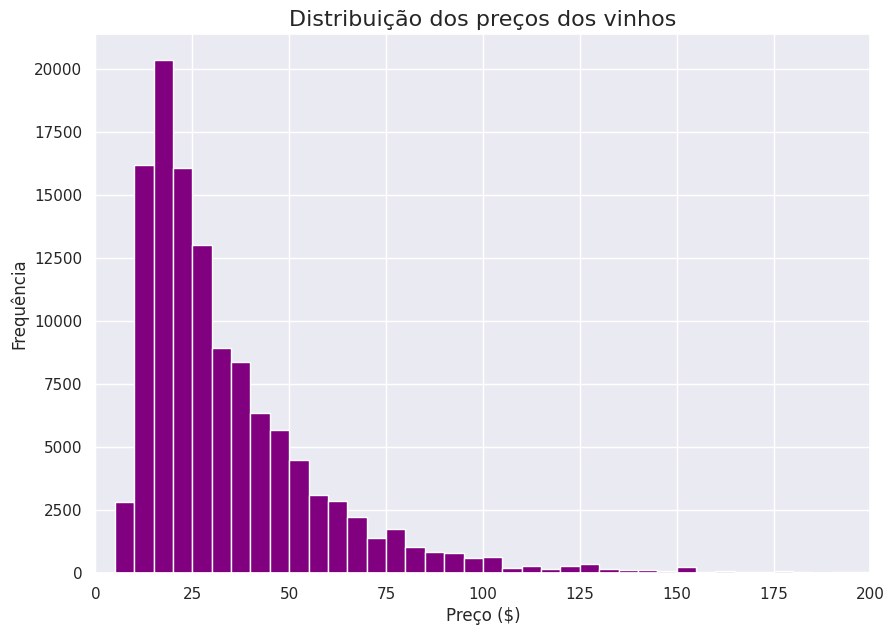

In [ ]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1['price'].max() + 5, 5)
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.xlim(0, 200)
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')


Os dados de preço dos vinhos apresenta uma distorção grande para a direita. Nesse caso precisamos de uma transformação logarítima nos dados.

In [ ]:
#distribuição normal
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [ ]:
# distribuição logaritmica
np.log10(df1["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


Utilizando os gráficos com a transformação logarítmica para o histograma.

Text(0, 0.5, 'Frequência')

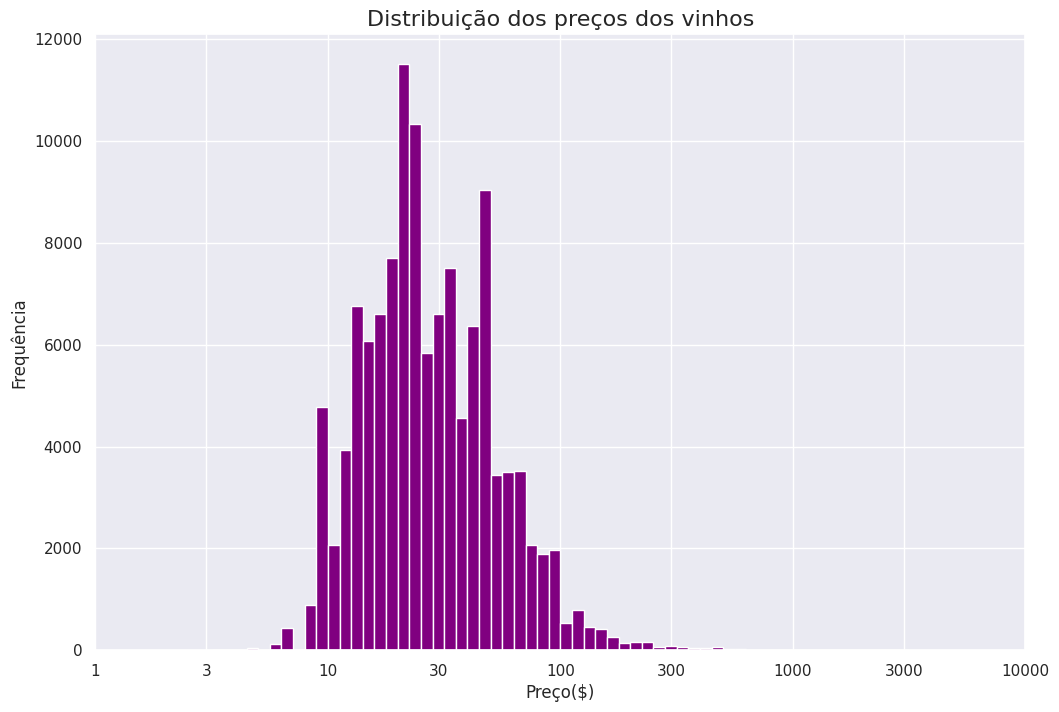

In [ ]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço($)')
plt.ylabel('Frequência')


Agora é possível ver uma distribuição (quase normal). Existe um salto na região dos 10 dólares e um pico mais visível em pouco mais de 20 dólares. Depois, temos outro pico acima de 50 dólares. Agora podemos plotar um gráfico do tipo scatter para visualizar se existe uma correlação entre a pontuação e o valor da garrafa.

In [ ]:
# heatmap (mapa de calor)

Text(0, 0.5, 'Pontos')

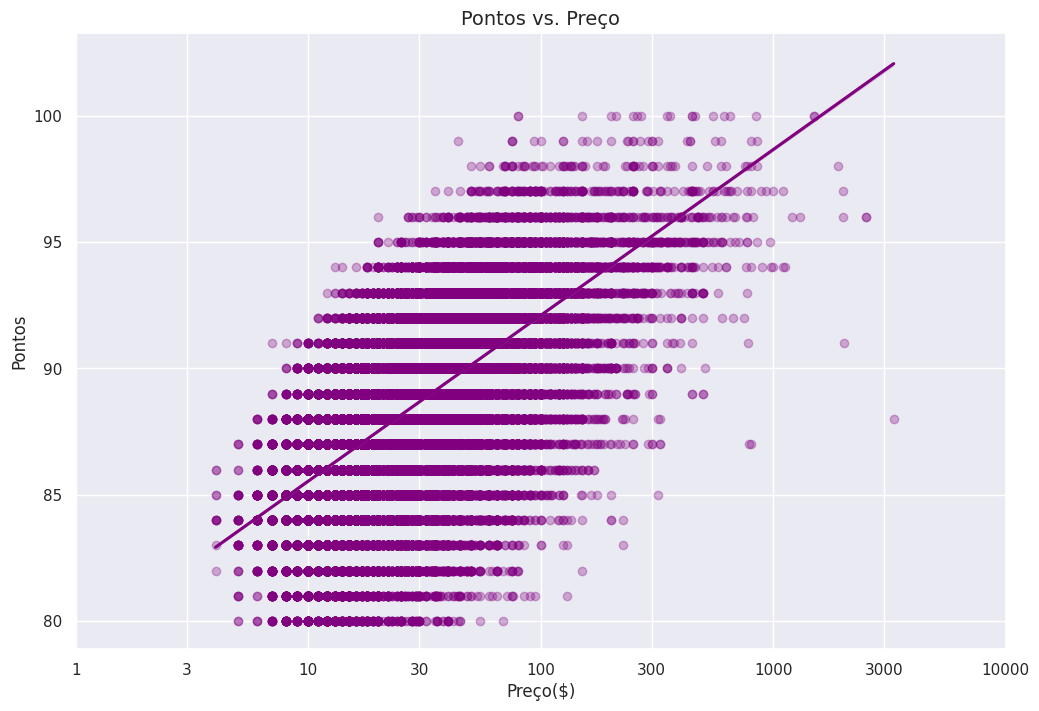

In [ ]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Purple', logx=True, scatter_kws={'alpha': 0.3})
plt.title("Pontos vs. Preço", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Preço($)")
plt.ylabel("Pontos")


O gráfico mostra uma relação positiva entre as duas variáveis (pontuação e preços), ou seja, vinhos mais caros tendem a receber melhores avaliações. Também é possível observar dois pontos mais afastados, um na região dos 4 dólares e outro pouco depois de 3000 dólares. Vamos listar esses dois valores para descobrir quais vinhos são esses, buscando pelo valor máximo e mínimo:

In [ ]:
df1[df1["price"] == df1["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [ ]:
df1[df1["price"] == df1["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Temos um vinho espanhol com 85 pontos de classificação que custa quatro dólares a garrafa e um vinho francês de 88 pontos que custa 3300 dolares agora vamos investigar se certas variedades de vinhos (tipos de uva) São de melhor qualidade, para isso podemos filtrar uma amostra de 20 melhores vinhos e ver como eles pontuam.

In [ ]:
df1["variety"].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


Vamos ao gráfico com boxplot:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

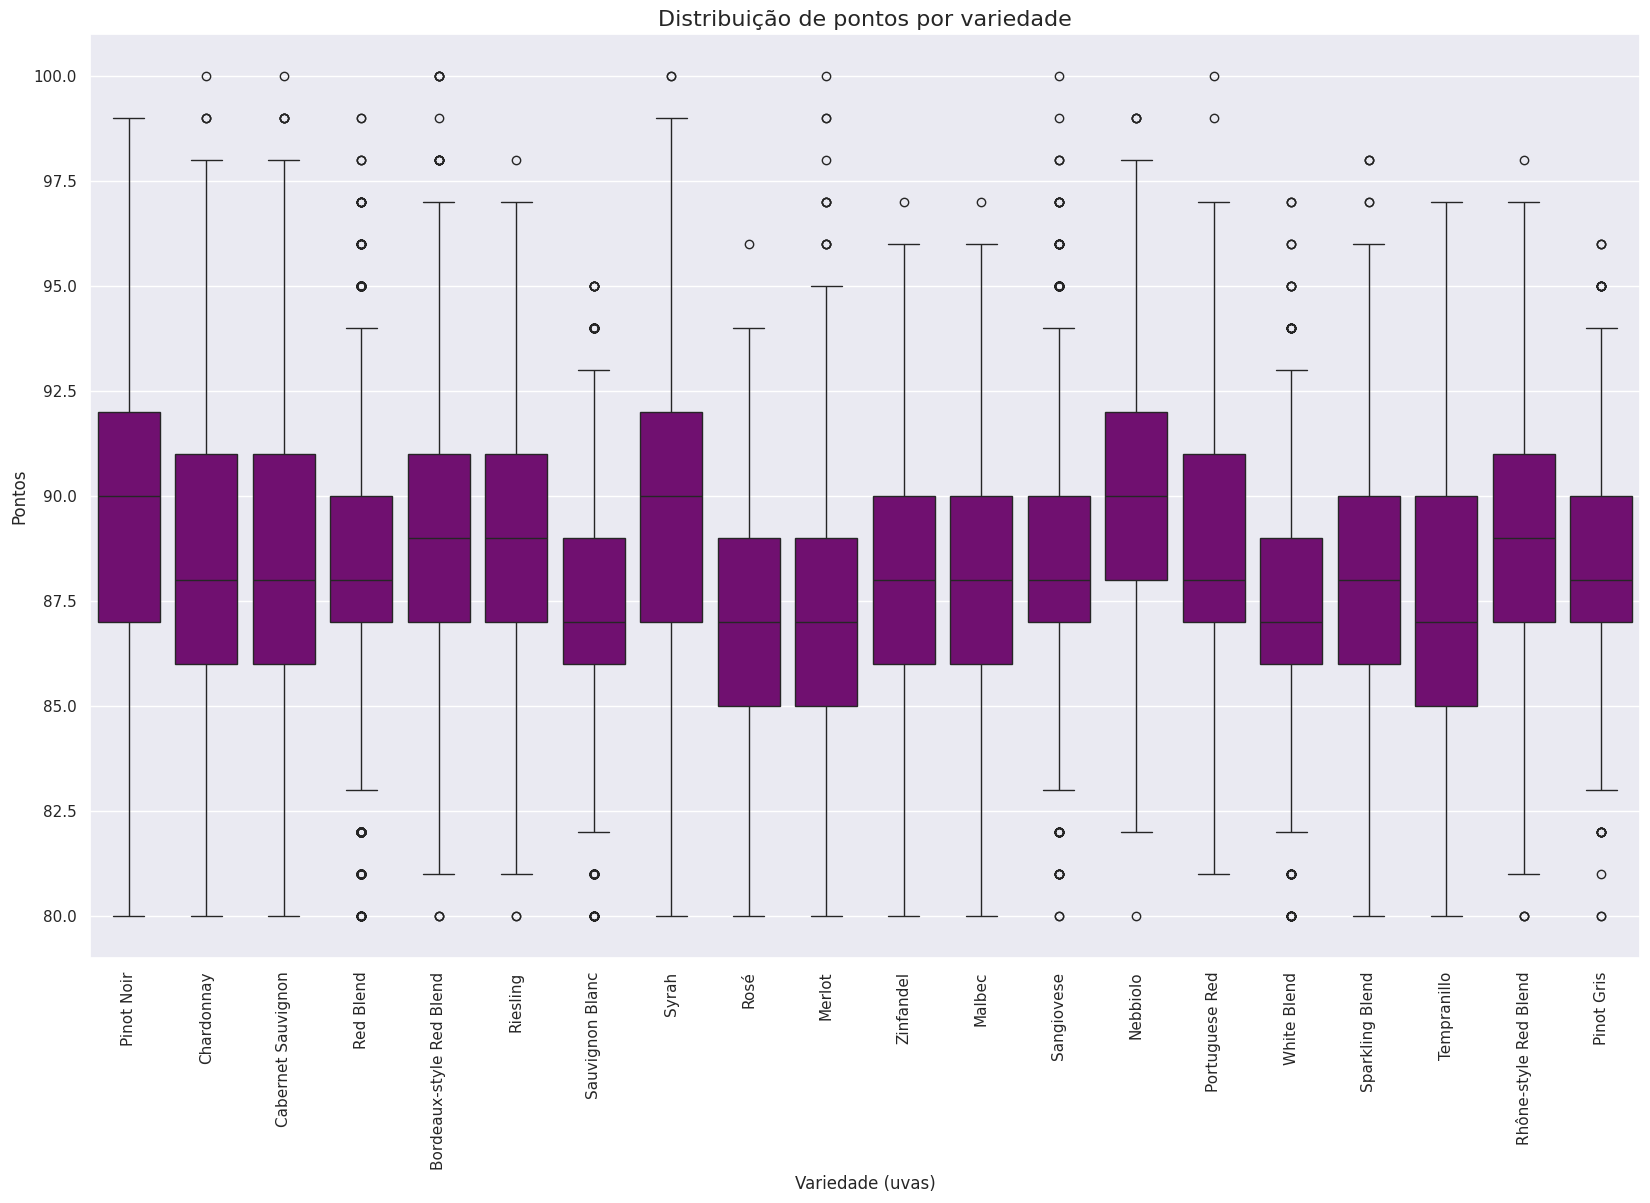

In [ ]:
plt.figure(figsize=(20, 12))
sns.boxplot(
    data=df1,
    x='variety',
    y='points',
    color="Purple",
    order=df1["variety"].value_counts().iloc[:20].index
)

plt.title('Distribuição de pontos por variedade', fontsize=16)
plt.xlabel('Variedade (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90)


Listando o Top 20 melhores vinhos (com melhor classificação) na base de dados, vemos que a variedade Pinot Noir tende a ter o melhor desempenho, com a pontuação média mais alta.

Já sabemos que a qualidade está fortemente relacionada ao preço, mas nem todos os clientes podem gastar 3000 dólares em uma garrafa de vinho toda semana. Nossa tarefa agora é descobrir o melhor custo-benefício em algumas faixas de preço:

Até $15
Entre $15 e $30
Entre $30 e $50
Acima de $50

In [ ]:
# Top 10 custando até $15
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])


,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


Com base nos dados, uma boa escolha aqui seria um vinho Português de 94 pontos por 13 dolares, quinta dos Murças 2011 Assobio Red(Douro)

In [ ]:
# Top 10 com valor entre $15 e $30
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])


,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


Já nessa lista, se o cliente estiver disposto a gastar um pouco mais. a melhor opção seria =um vinho dos EU&A de 96 pontos por 20 dolares.

In [ ]:
# top 10 com valor entre 30 e 50 dolares
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


Se a preferência do cliente for da variedade Chardonnay, nesse filtro é possivel levar um vinho de 99 pontos por 44 dolares.

In [ ]:
#top 10 com valor acima de 50
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


Quais as palavras mais utilizadas para descrever um vinho

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = df1["description"][1]
text = " ".join(i for i in df1["description"])
len(text)

29653210

Com isso agora tem um imenso texto agrupado

In [ ]:
STOPWORDS = set(STOPWORDS)
STOPWORDS.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1600, height=800).generate(text)

Com a nuvem pronta agorasó precisa plotar uma imagem exibindo as palavras mais utilizadas

(-0.5, 1599.5, 799.5, -0.5)

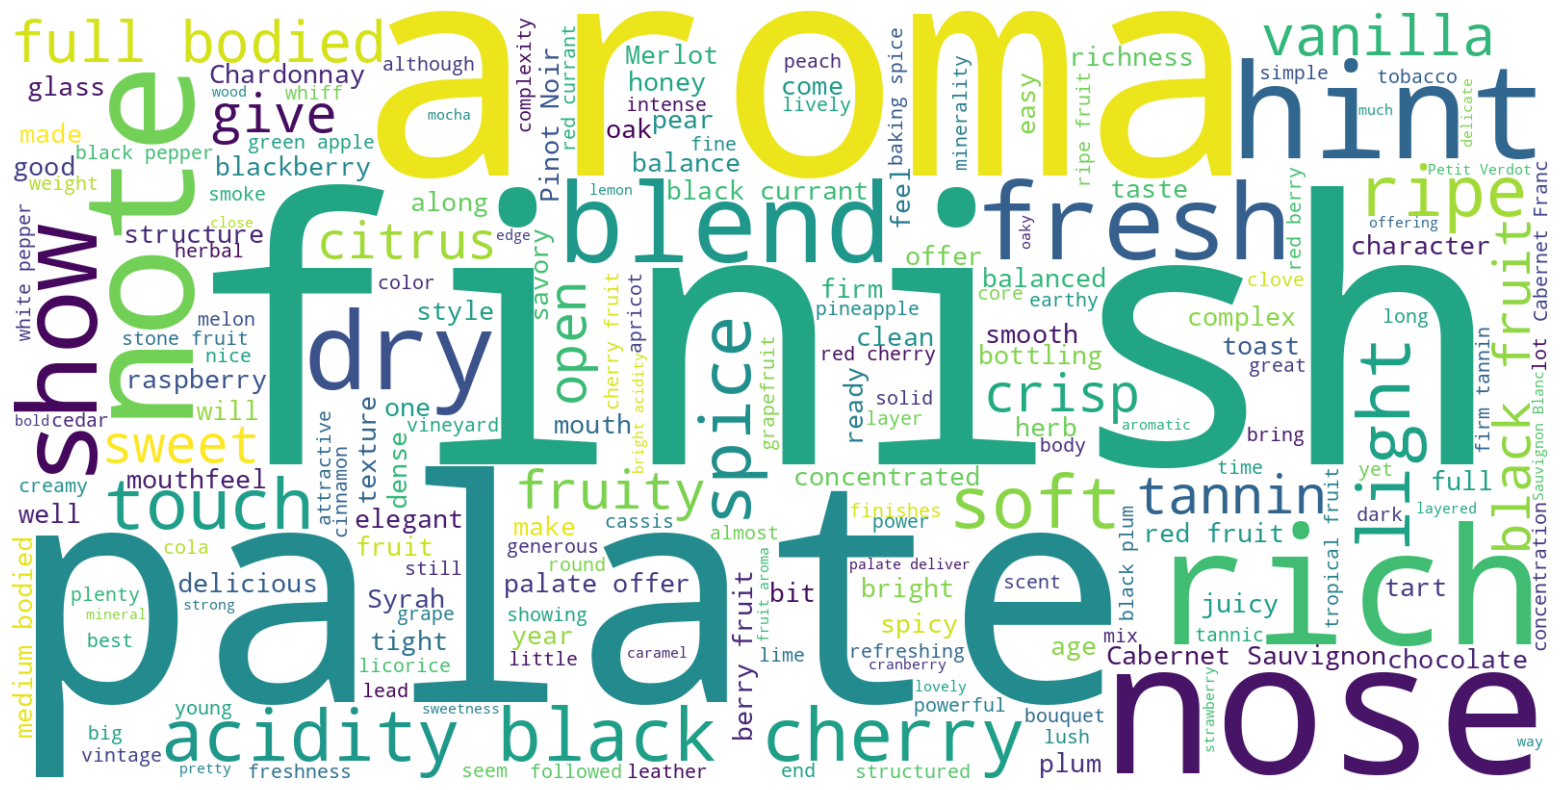

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## CONCLUSÃO

1. De onde vem o melhor vinho?
A análise mostrou que, com base na média de pontuação, os vinhos da Inglaterra tiveram a melhor média de avaliação, mas isso pode ser distorcido pela menor quantidade de vinhos na base de dados. Países como Portugal, EUA, Itália, França e Austrália têm vinhos que atingiram a pontuação máxima de 100, indicando uma excelente qualidade.
2. O preço do vinho está relacionado com a qualidade?
Sim, existe uma correlação positiva entre o preço do vinho e sua pontuação. A análise do gráfico de dispersão revelou que vinhos mais caros tendem a receber melhores avaliações, embora existam algumas exceções (como vinhos mais baratos com boas notas e vinhos extremamente caros com notas medianas).
3. Certas variedades de uvas são de maior qualidade?
A variedade de uva Pinot Noir tende a apresentar uma pontuação mais alta, seguida de Chardonnay e Cabernet Sauvignon. Essas variedades são frequentemente associadas a vinhos de alta qualidade.
4. Qual é o melhor vinho em cada faixa de preço?
Foram identificados os melhores vinhos em diferentes faixas de preço:
Até $15: Vinho Português "Quinta dos Murças 2011 Assobio Red (Douro)" com 94 pontos.
Entre $15 e $30: Vinho dos EUA com 96 pontos por $20.
Entre $30 e $50: Vinho Chardonnay com 99 pontos por $44.
Acima de $50: Há várias opções excelentes, incluindo vinhos de 100 pontos.
5. Que palavras são mais utilizadas para descrever um vinho?
A nuvem de palavras gerada a partir das descrições dos vinhos mostrou que termos como "aroma", "fruta", "corpo", "taninos", entre outros, são frequentemente usados para descrever as características dos vinhos. Foram excluídas palavras comuns como "drink", "now", "wine", e "flavors" para focar nos termos mais descritivos.

outras análises


Qual é o país com o melhor custo-benefício em vinhos abaixo de $20?
# - Ucrania

Filtrei o dataset para vinhos com preço inferior a 20 dolares e calculei a relação pontuação/preço para cada país. Em seguida, fiz uma média dessa relação por país.

In [ ]:
under_20 = df1[df1["price"] <= 20]
country_value = under_20.groupby("country").apply(lambda x: (x["points"] / x["price"]).mean())
country_value.sort_values(ascending=False).head(10)


,0
country,
Ukraine,9.671551
Romania,9.554091
Moldova,7.782958
Bulgaria,7.400870
Portugal,7.156939
India,7.129465
Bosnia and Herzegovina,6.935897
Chile,6.784895
Spain,6.615322


Quais são as 5 melhores regiões de vinhos da França com base na pontuação média?

Bordeaux
Bourgogne
Champagne
Loire Valley
Roussillon


Filtrei o dataset para vinhos franceses e calculei a média das pontuações por região (coluna province). Em seguida, selecionei as cinco regiões com as maiores médias de pontuação.



In [ ]:
france_wines = df1[df1["country"] == "France"]
top_france_regions = france_wines.groupby("province")["points"].mean().sort_values(ascending=False).head(5)


Qual é a variedade de uva com a melhor avaliação em vinhos dos EUA?

Cabernet Sauvignon
Filtrei o dataset para vinhos dos EUA e calculei a média das pontuações por variedade de uva (coluna variety). A variedade com a melhor avaliação foi o Cabernet Sauvignon.

In [ ]:
usa_wines = df1[df1["country"] == "US"]
top_varieties_usa = usa_wines.groupby("variety")["points"].mean().sort_values(ascending=False).head(5)
